<a href="https://colab.research.google.com/github/Sufiyanyoonus/Deep-Learning/blob/main/Deep_Learning_Predicting_Diabetes_Progression_using_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:
You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.


# The Diabetes Data set from Sklearn

In [3]:
# loading the data set
from sklearn.datasets import load_diabetes
import pandas as pd

In [4]:
# Importing the necessary libraries
from sklearn.datasets import load_diabetes

# Load diabetes dataset
diabetes_data = load_diabetes()

# Print a quick summary of the dataset
print(diabetes_data)



{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [5]:
# creating the data frame
df=pd.DataFrame(data=diabetes_data.data,columns=diabetes_data.feature_names)
# adding the target varaible to the dataframe
df['target']=diabetes_data.target

# printing the data frame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


#EDA

In [6]:
df.info() #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


we can see that all columns are numerical

In [7]:
df.shape # shape of the dataset with number of columns and rows

(442, 11)

In [8]:
df.columns # all columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [9]:
df.describe() # statistics analysis

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
df.isnull().sum() # chekuing the null values in the columns

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [11]:
df.duplicated().sum() # checking any duplicate values

0

##Feature Scaling
##Feature scaling refers to the process of transforming the values of independent variables so that they have common characteristics,

In [12]:
# importing the neceessary Libraries
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler() # Normalizinbg the features
df[df.columns[:-1]]=scaler.fit_transform(df[df.columns[:-1]]) # fit and tranasform all the columns exluding the last column the "target"  varaible
print(df.head())  # print

        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  target  
0  0.562217  0.439394   151.0  
1  0.222437  0.166667    75.0  
2  0.496578  0.409091   141.0  
3  0.572923  0.469697   206.0  
4  0.362385  0.333333   135.0  


##Detecting the ouliers

<Figure size 1500x800 with 0 Axes>

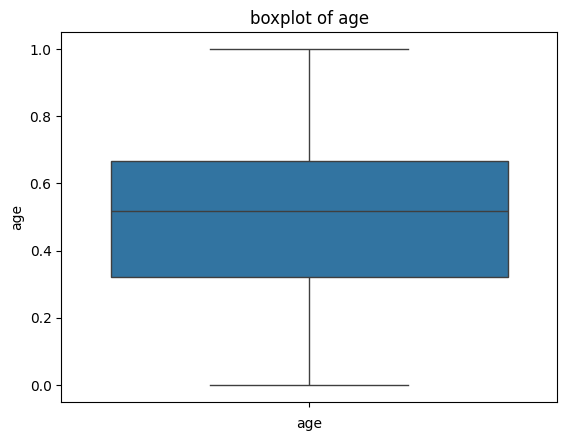

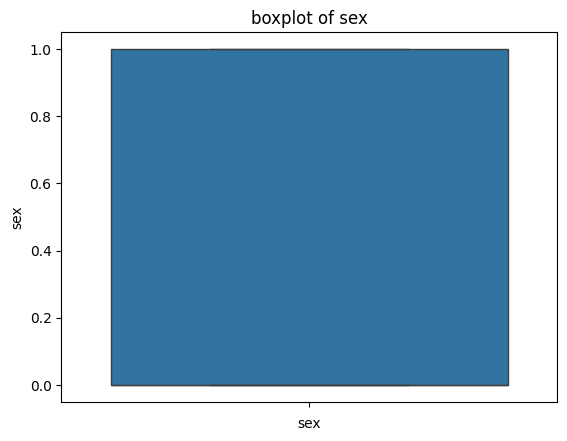

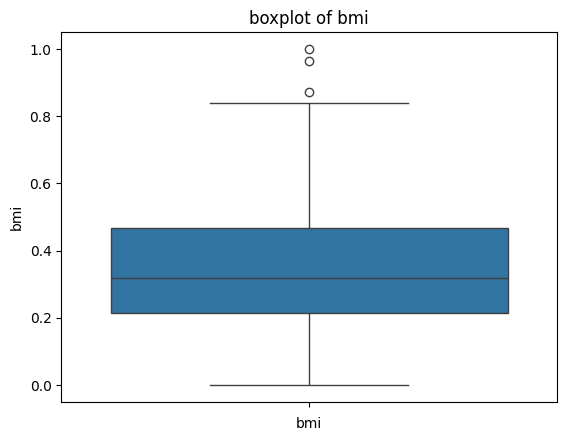

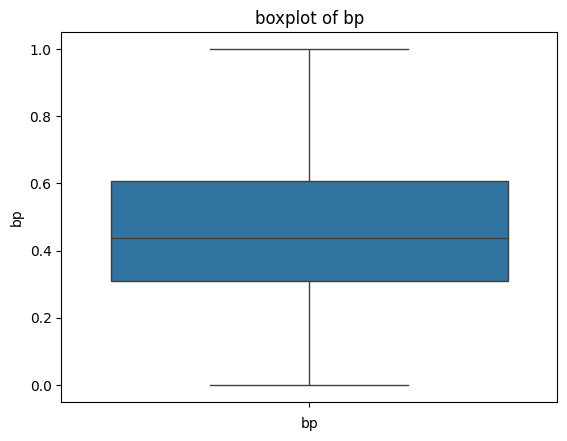

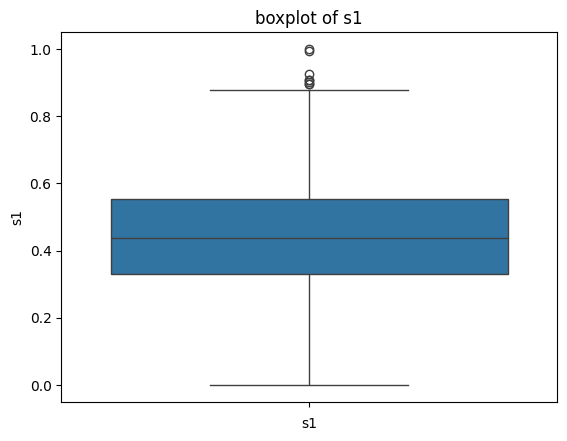

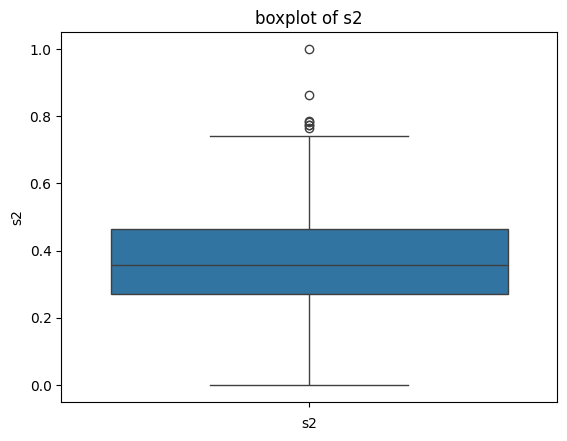

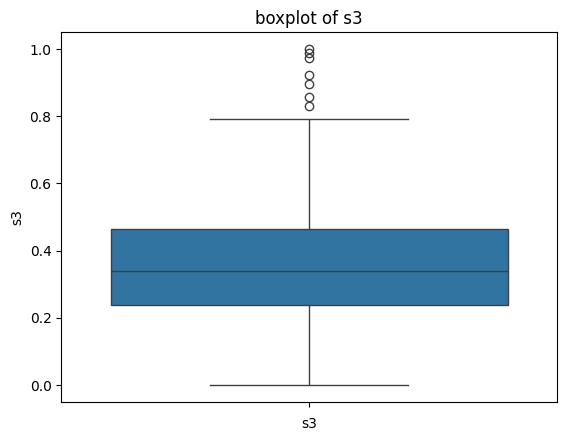

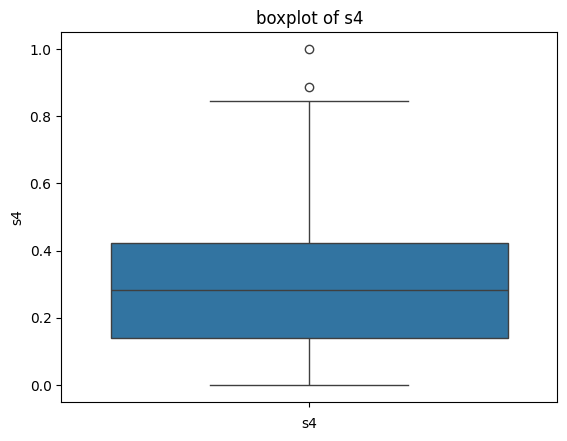

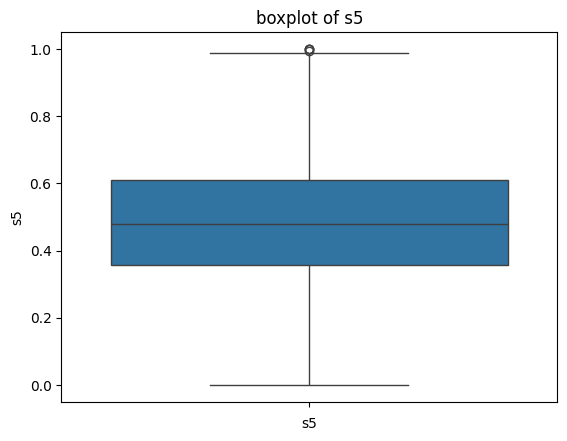

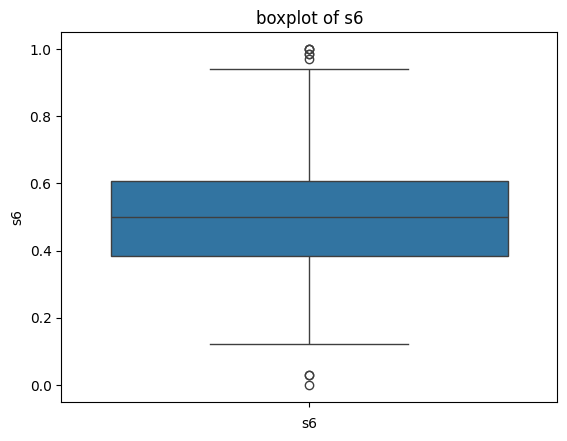

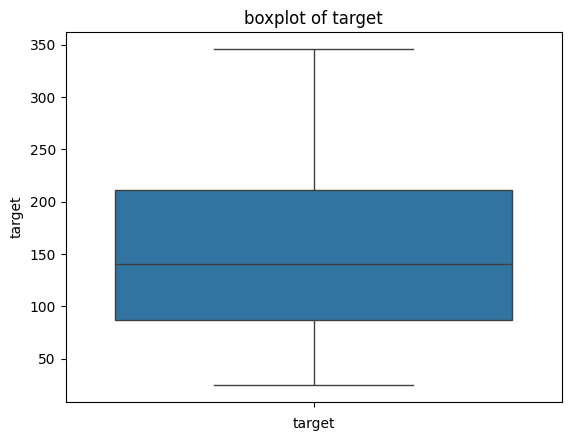

In [13]:
# importing necessary Libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8)) # visulaizing te box plot of all variables for cheking the outliers
for column in df : # createing the loop o
  plt.figure() # sepreate figure for each variables
  sns.boxplot(y=df[column])  # box plot
  plt.title(f'boxplot of {column}')
  plt.xlabel(column)
  plt.show()

## Since this is a medical data set it is wise not replcae or remove outliers due to rare cases and informations

# Visualizing feature distributions

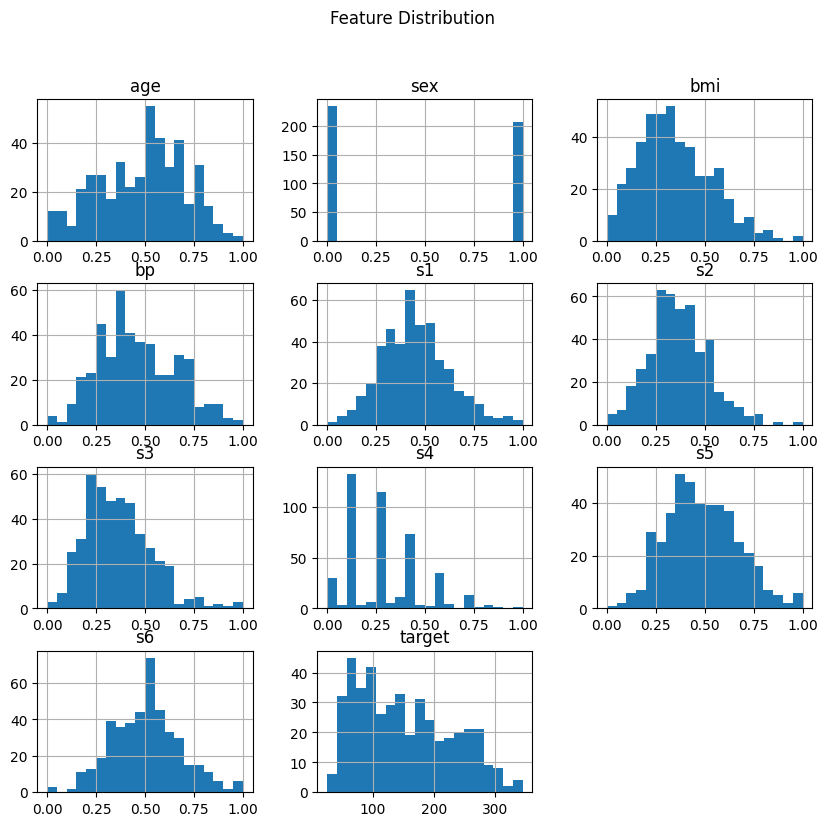

In [14]:
df.hist(bins=20,figsize=(10,9))
plt.suptitle('Feature Distribution')
plt.show()

# Visualizing the correlation between features and the target variable

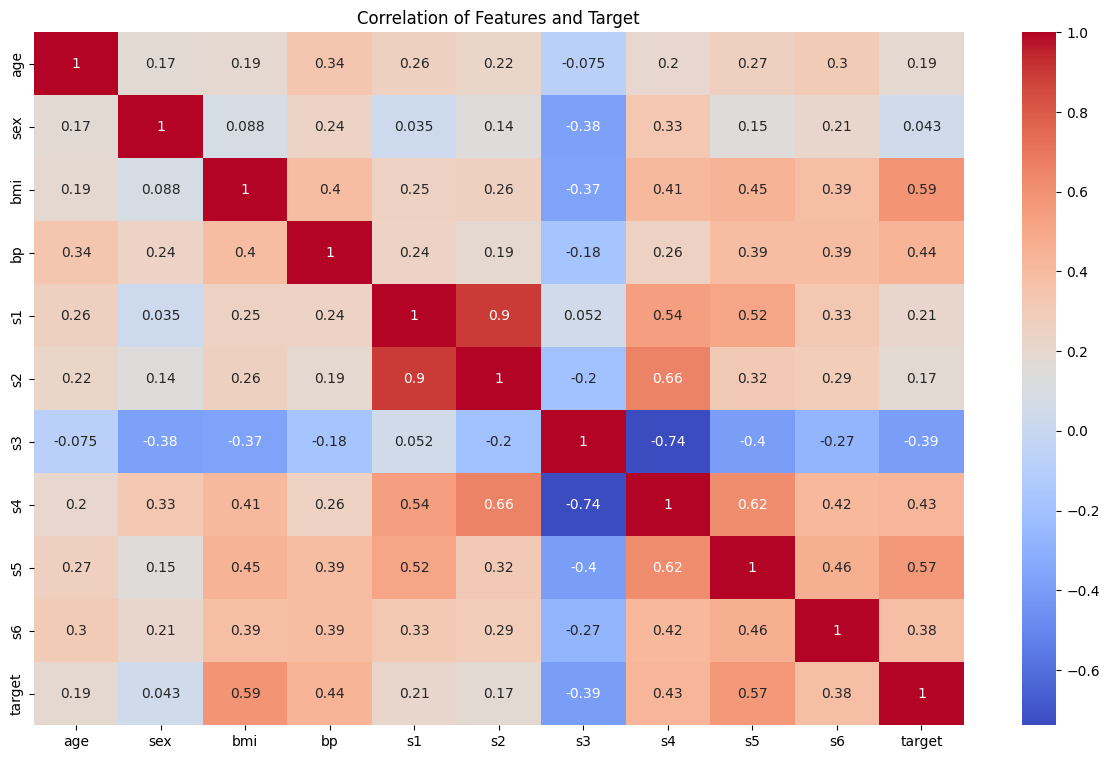

In [15]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation of Features and Target")
plt.show()

##from above correlation we can see that age doesnt affect the diabet due to weak positrive correlation  and S1 S2  also less effect on target varaible due to weka postive correlation means it doesnt influence the diabetes and S3 have strong negative correlation and all other have strong positive correaltion

# Scatter plots of features vs target to visualize relationships

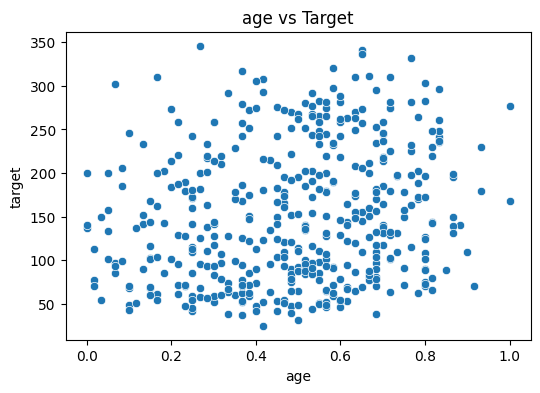

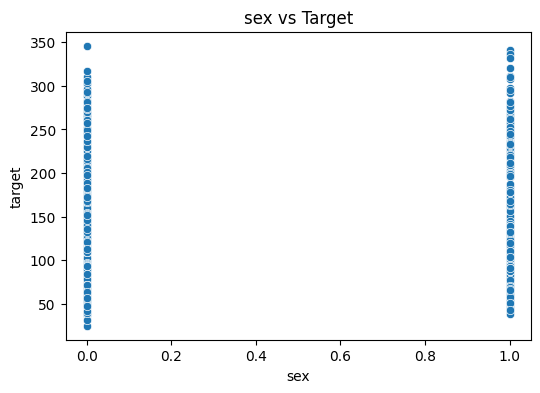

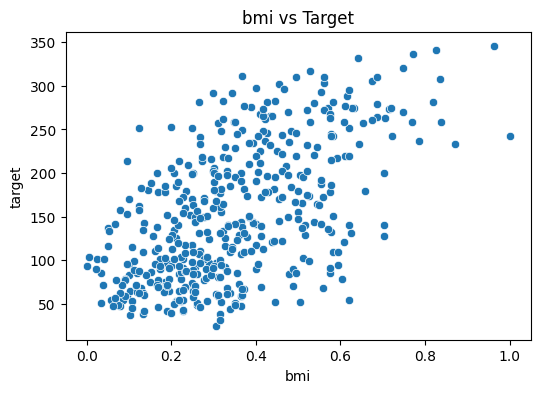

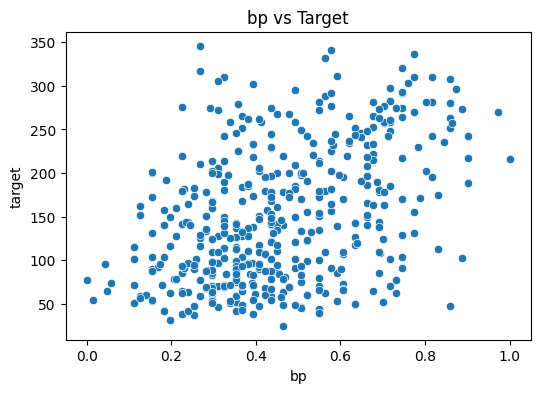

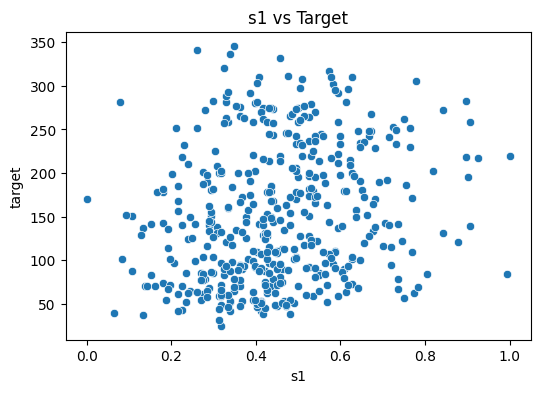

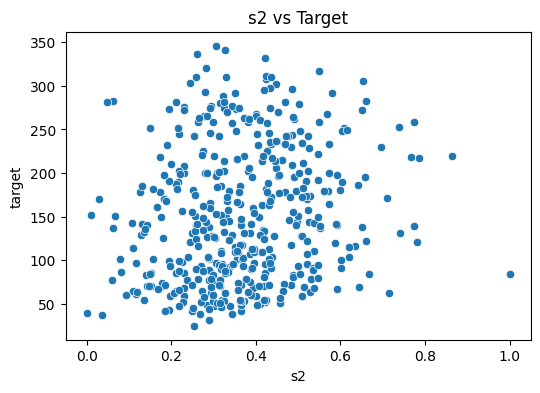

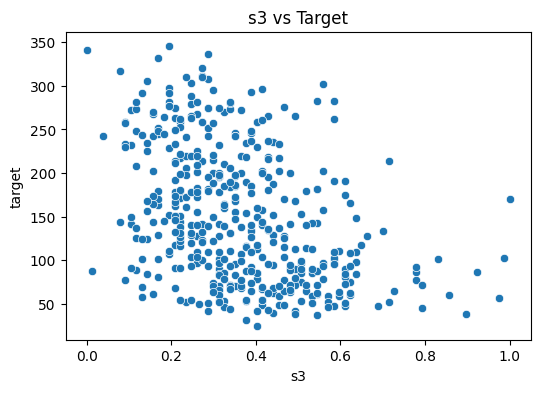

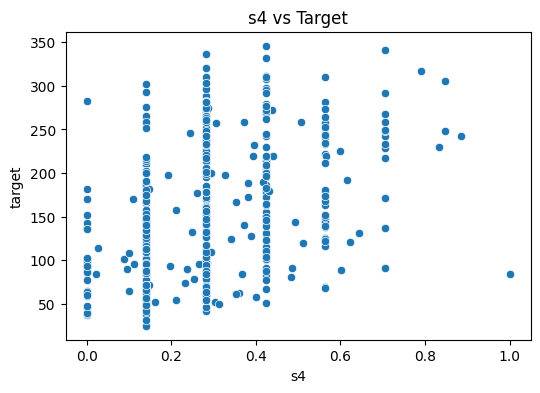

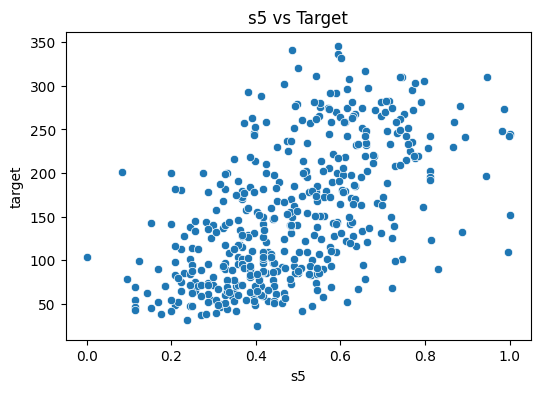

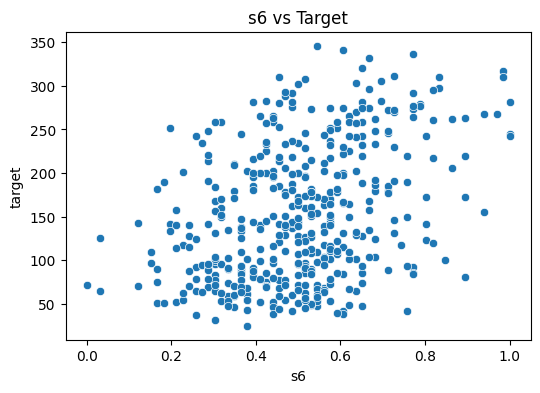

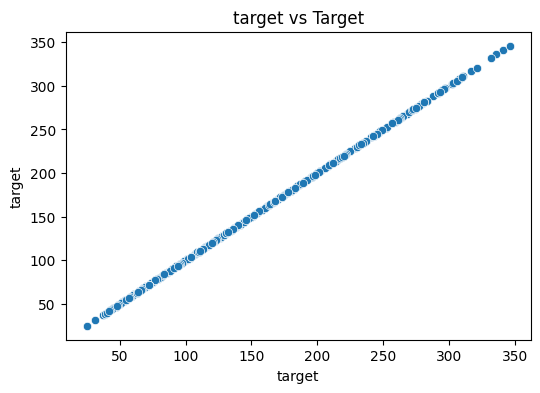

In [16]:
# Scatter plots of features vs target to visualize relationships
for feature in df:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f'{feature} vs Target')
    plt.show()

#Creating the ANN Model

In [26]:
pip install keras

In [27]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [61]:
x=df.drop(columns=['target']) # features
y=df['target'] ## target variable

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(50,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [63]:
# Train the model
history=model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30251.1445 - mean_absolute_error: 155.3881
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29839.7168 - mean_absolute_error: 153.6518 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26756.1602 - mean_absolute_error: 145.5749  
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30235.7129 - mean_absolute_error: 154.7039 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28256.8926 - mean_absolute_error: 149.6565 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27588.2012 - mean_absolute_error: 146.7909 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24915.2793 - mean_absolute_error: 139.2296 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23862.7598 - mean_absolute_error: 133.5419  
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20922.1641 - mean_absolute_error: 123.0069 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17016.2344 -

#Evaluvating the model

In [64]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

loss_mae = model.evaluate(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE : {mae}')
print(f'MSE : {mse}')
print(f'R2  : {r2}')
print(f'loss: {loss_mae[0]}')



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3149.4026 - mean_absolute_error: 46.3777  
MAE : 44.93151984054051
MSE : 2950.1883343786003
R2  : 0.4431665089236815
loss: 2950.188232421875


In [66]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

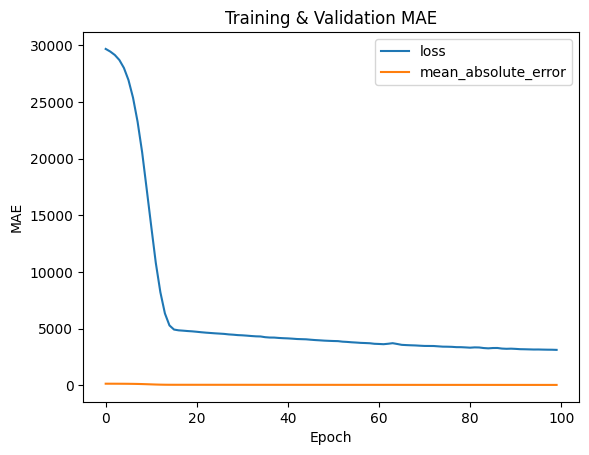

In [67]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


## from above the mean squared error and r2 score we can see that this model needs improvement

#Improving the Model

In [68]:
# by adding more hidden layers and neurons
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [70]:
# Train the model by increasing the epoches and also by increasing the batch size
history=model.fit(x_train, y_train, epochs=150, batch_size=40, verbose=1)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 30390.6367 - mean_absolute_error: 155.2679
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29813.8457 - mean_absolute_error: 154.8115 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30645.5000 - mean_absolute_error: 156.1236 
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29107.0801 - mean_absolute_error: 152.0630 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26368.6973 - mean_absolute_error: 143.6622 
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28464.3438 - mean_absolute_error: 149.3535 
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24838.6309 - mean_absolute_error: 138.5075 
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21536.7305 - mean_absolute_error: 124.2912 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16331.2793 - mean_absolute_error: 103.6588 
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10008.0156 - mean_absolute_error: 

In [71]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Report the performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Mean Squared Error (MSE): 2921.3025
R² Score: 0.4486


## By adding one more hidden layer and additional neurons the model does  slightly improved compared to the first

In [72]:
# changing the activation function to sigmoid an tanh
model=Sequential()
model.add(Dense(100,activation='tanh',input_shape=(x_train.shape[1],))) # changed the activatuion function to tanh
model.add(Dense(50,activation='sigmoid')) # changed the activation function to sigmoid
model.add(Dense(units=1))

# compilng the data
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

# train the model
history=model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30398.5273 - mean_absolute_error: 156.8567
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30247.6445 - mean_absolute_error: 155.1687 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28561.5801 - mean_absolute_error: 149.5356 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29799.4629 - mean_absolute_error: 152.6727 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27759.5176 - mean_absolute_error: 148.3284 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28694.9355 - mean_absolute_error: 149.4324 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26618.3594 - mean_absolute_error: 143.5212 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26353.1953 - mean_absolute_error: 142.7508 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26888.2793 - mean_absolute_error: 143.4621 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26535.8223 - mean_absolute

In [56]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Report the performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Mean Squared Error (MSE): 16539.6968
R² Score: -2.1218


## Above model is the Worst model builded high -r2-score and mean squared error

In [100]:

# by adding more hidden layers and changing the activation in output layer to linear
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(x_train.shape[1],)))

model.add(Dense(60,activation='relu'))



model.add(Dense(units=1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
# compilng the data
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

# train the model
history=model.fit(x_train, y_train, epochs=150, batch_size=50, verbose=1)

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 29568.0254 - mean_absolute_error: 154.2065
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29851.4082 - mean_absolute_error: 153.1350 
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28489.7715 - mean_absolute_error: 149.8796 
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28667.4336 - mean_absolute_error: 149.9992 
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27740.5801 - mean_absolute_error: 148.1462 
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27971.0234 - mean_absolute_error: 147.3218 
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25719.8516 - mean_absolute_error: 141.7087 
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27606.3203 - mean_absolute_error: 147.0482 
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25302.6309 - mean_absolute_error: 139.0753 
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23515.4102 - mean_absolute_error: 

In [102]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Report the performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Mean Squared Error (MSE): 2878.0470
R² Score: 0.4568


#Above model best r2 score and lowes mean square value considering the best model

In [112]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Create the model
model = Sequential()

# Input layer with hidden layers
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout 30%

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3)) #30%

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output layer with linear activation
model.add(Dense(units=1, activation='linear'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Earlyy stopping


# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 31709.6855 - mean_absolute_error: 159.7116 - val_loss: 22431.7441 - val_mean_absolute_error: 133.9046
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30771.4316 - mean_absolute_error: 157.1615 - val_loss: 22342.6699 - val_mean_absolute_error: 133.5895
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32689.0566 - mean_absolute_error: 163.1818 - val_loss: 22250.5801 - val_mean_absolute_error: 133.2676
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31607.1055 - mean_absolute_error: 160.2296 - val_loss: 22145.6445 - val_mean_absolute_error: 132.9035
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29830.0918 - mean_absolute_error: 154.8972 - val_loss: 22037.4551 - val_mean_absolute_error: 132.5389
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30363.4570 - mean_absolute_error: 156.7658 - val_loss: 21924.7949 - val_mean_absolute_error: 132.1679
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/

In [113]:
# Predicting the model
y_pred=model.predict(x_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Report the performance metrics
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R² Score: {r2:.4f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Mean Squared Error (MSE): 25352.0619
R² Score: -3.7851


# to get the best sequental i consideres by evaluvating with diff types of activation functions,tuning ,epoches,but by simply adding one midlle layer anhd changing the  epochs=150, batch_size=50 i got the highest r2-score and lowest mean _score error